
# Project: Investigate a Dataset - [TMDB-Movies]


This is an interesting 50 years long dataset that talks about the movie industry, looking at the different genres of the movies, their producing companies and directors, their popularity overtime, budget and revenue generated over the years and their adjusted values among other information embedded in it

As part of the cleaning required in this dataset,I would have to check for and drop duplicates if they exists, I would have to split some columns,drop some columns and rows that would not be necessary for my analysis

From this dataset I seek to answer the following questions:
1. Which genre of movie is the most popular?
2. Which movie genres are the most profitable?
3. Does there exist relationship between popularity and profit generated?
4. Which year was the most profitable year?
5. In what year was the highest number of movies produced?
6. Which production company is the most popular?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv("C:/Users/USER/Downloads/tmdb-movies.csv")
df1.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df1.drop(['id','imdb_id','homepage','cast','tagline','keywords','overview','vote_count','vote_average'],axis = 1,inplace = True)

Given the fact that i would not be using all the columns for analysis, i dropped off the redundant ones as to facilitate ease of navigation

In [5]:
df1.info()
# now we can see the reduced dataset that I would be using for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1018.8+ KB


In [6]:
df1.dropna(inplace = True)

From the dataset, the null values have little or no significance in my work thus i dropped the rows with the null values

In [7]:
#To split the columns, I applied the lambda function as shown below. 
#For my analysis,I have decided to use the first genres and production_companies from each column while droping off rest.
df1['genres'] = df1['genres'].apply(lambda x: x.split('|')[0])
df1['production_companies'] = df1['production_companies'].apply(lambda x: x.split('|')[0])

In [8]:
df1['genres'].head(2)

0    Action
1    Action
Name: genres, dtype: object

In [9]:
df1['production_companies'].head(2)

0            Universal Studios
1    Village Roadshow Pictures
Name: production_companies, dtype: object

The two lines of code above serves to show the splitting done 

In [10]:
df1.duplicated().sum()

1

In [11]:
df1.drop_duplicates(inplace = True)


Surprisingly there is only one duplicate value in the dataset, since a duplicate value is not neccessary fro analysis, I drop the row.

In [12]:
df1.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,0.693143,1.612525e+07,4.407785e+07,102.744340,2000.890271,1.935070e+07,5.685528e+07
std,1.035525,3.216819e+07,1.224038e+08,28.134561,13.032372,3.562179e+07,1.512243e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231581,0.000000e+00,0.000000e+00,90.000000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418756,1.403930e+05,0.000000e+00,100.000000,2005.000000,2.410618e+05,0.000000e+00
75%,0.774231,1.900000e+07,3.064621e+07,112.000000,2011.000000,2.439107e+07,4.255193e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,2015.000000,4.250000e+08,2.827124e+09


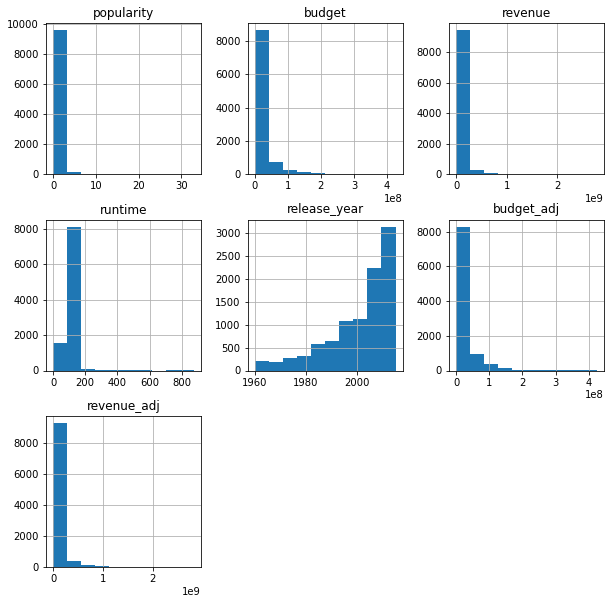

In [13]:
df1.hist(figsize = (10,10));

Just before we start our analysis, let us look at the distribution of our dataset right above( concentrating more on the popularity,revenue,budget and profit distributions)
One might be **tempted** to assume a relationship to exist between these as they are almost alike in their distributions, now lets explore further.

## Research Question 1 (What is the most popular genre?)

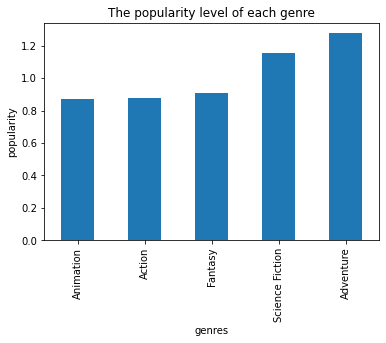

In [14]:
df1.groupby('genres')['popularity'].mean().sort_values().tail().plot(kind = 'bar');
plt.xlabel('genres')
plt.ylabel('popularity')
plt.title('The popularity level of each genre')
plt.show()

This goes to show the five most popular genres of movies with Adventure being the most popular

## Research Question 2 (Which movie genre is the most profitable?)

In [15]:
df1['profit'] = df1['revenue'] - df1['budget']
df1['profit'].head(10)

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
5     397950503
6     285603537
7     487380321
8    1082730962
9     678708609
Name: profit, dtype: int64

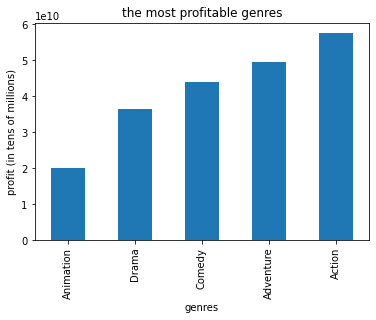

In [16]:
df1.groupby('genres')['profit'].sum().sort_values().tail().plot(kind = 'bar');
plt.xlabel('genres')
plt.ylabel('profit (in tens of millions)')
plt.title('the most profitable genres')
plt.show()

From the barchart above, Action genres is the most profitable overtime

## Research Question 3 (Is there any relationship between popularity and profit generated?)

In [17]:
def scatter_plot (a,b,c):
    sns.regplot(x = df1[a], y = df1[b])
    plt.title(c)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show
    

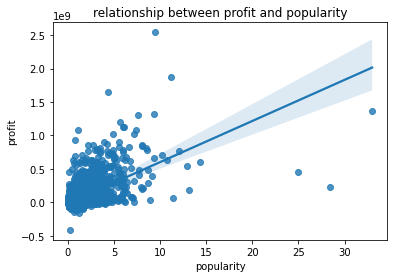

In [18]:
scatter_plot('popularity','profit','relationship between profit and popularity')

There exists a positive relationship between profit and popularity. This is to say that to a certain extent the change in profit is brought about by the change in popularity.

##  Research Question 4 (In which year was the highest profit made?)

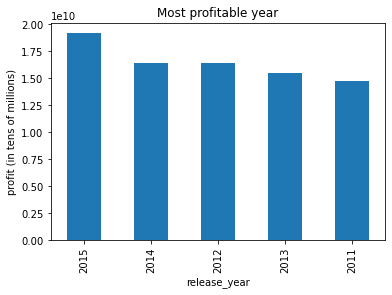

In [19]:
df1.groupby('release_year')['profit'].sum().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('release_year')
plt.ylabel('profit (in tens of millions)')
plt.title('Most profitable year')
plt.show()

2015 is the most profitable year in the space of the 50 years

## Research Question 5 (In what year was the highest number of movies produced?)

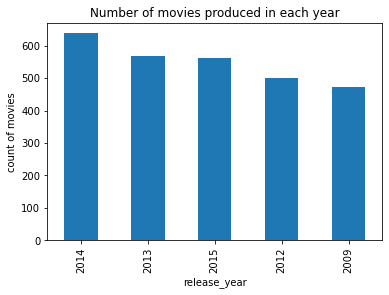

In [20]:
df1.groupby('release_year')['original_title'].count().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('release_year')
plt.ylabel('count of movies')
plt.title('Number of movies produced in each year')
plt.show()

The chart above shows 2014 as having the largest number of movies produced overtime.

## Research Question 6 (Who are the most profitable production companies?)

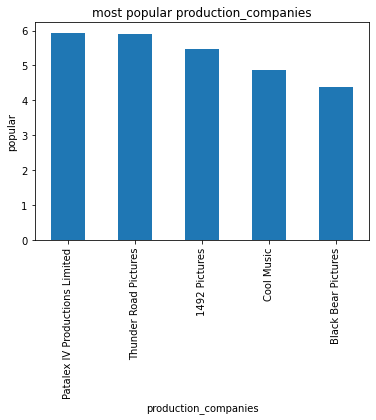

In [21]:
df1.groupby('production_companies')['popularity'].mean().sort_values(ascending = False).head().plot(kind = 'bar')
plt.xlabel('production_companies')
plt.ylabel('popular')
plt.title('most popular production_companies')
plt.show()

Over the years analysed, Patalex IV Productions Limited is the most popular on the average.

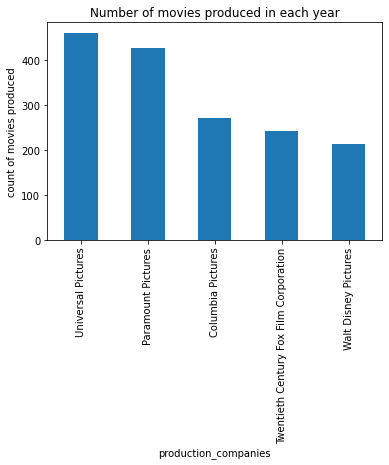

In [22]:
df1.groupby('production_companies')['original_title'].count().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('production_companies')
plt.ylabel('count of movies produced')
plt.title('Number of movies produced in each year')
plt.show()

Despite Patalex IV Productions Limited being the most popular production company on the average, Universal Pictures seems to have produced the most number of movies.

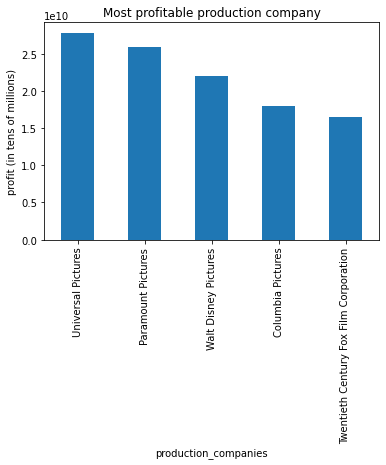

In [23]:
df1.groupby('production_companies')['profit'].sum().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('production_companies')
plt.ylabel('profit (in tens of millions)')
plt.title('Most profitable production company')
plt.show()

It became interesting to find out that the first five companies in the ratio of movies production also were the first five in the ratio of profit making with Universal Pictures still topping the list.

## Interpretation of Findings

Following the list of questions asked in the introductory part of this analysis

I have found Adventure to be the most popular genre of movie on the average within the timeframe considered.

There was no profit column given in the dataset and thus to derive profit I assumed the budget provided to be the cost of movie production while the revenue column is the revenue generated from the movies produced. Profit is given by the difference between the revenue and the production cost as seen above in the question 2 analysis. From the findings, Action genre appears to be the most profitable, this goes to negate the notion(it is believed that money is a major determinant of popularity) that the popularity of a movie is not solely explained by the money it generated. 
Further analysis of this in the question 3 shows there to exist a positive relationship between popularity and profit, it is necessary to state that this relationship is not a perfect relationship, other factors like marketing strategy which is not accounted for in dataset can also be part of the explanatory reason for the popularity

Movies produced in 2015 had the highest profit recorded so far, while 2014 had the highest number of movies produced. The trend over time shows that there has been positive appreciation of movies from the 90s' to the present given the increase in number and profit figures overtime

Patalex IV Productions Limited is the most popular production company, while Universal Pictures have produced the highest number of movies and is the most profitable

 There exists other factors that explain the popularity that are not included in the dataset, this is a limitation to properly explaining the reason for the popularity as seen in the dataset